In [1]:
library(tidyverse)
library(broom)
library(vegan)
library(cowplot)
library(patchwork)
library(readxl)
library(lubridate)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘lubridate’


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Metabolomics beta diversity

In [2]:
meta = read_tsv('../../data/metadata/blood_sample_inventory.txt') %>% rename(BabyN = Subject, VisitCode = `Visit #`)
head(meta)

Rows: 180 Columns: 13
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (10): Type of Visit, Visit #, Visit Date, DOB, Method, Serum or Plasma, ...
dbl  (3): Subject, Age (days), Freeze/Thaw Cycles

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


BabyN,Type of Visit,VisitCode,Visit Date,DOB,Age (days),Method,Serum or Plasma,Freeze/Thaw Cycles,Proteomics (10-15ul),Proteo Box Location,Metabolomics (55ul),Metabol Box Location
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
103,Well Check 02m,V5,4/27/18,2/21/18,65,Heelstick,Serum,1,15UL,Box1_A1,----,----
106,Well Check 02m,V5,5/29/18,3/27/18,63,Heelstick,Serum,2,15UL,Box1_A2,----,----
110,Well Check 02m,V5,7/9/18,5/7/18,63,Heelstick,Serum,2,15UL,Box1_A3,----,----
113,Well Check 02m,V5,7/26/18,5/15/18,72,Heelstick,Serum,2,15UL,Box1_A4,----,----
115,Well Check 04m,V6,8/24/18,5/24/18,92,Heelstick,Serum,2,15UL,Box1_A5,----,----
119,Well Check 02m,V5,8/30/18,6/30/18,61,Heelstick,Serum,1,15UL,Box1_A6,55UL,Box1_A1


In [3]:
abunds = read_excel('../../data/metabolomics_abunds.xlsx')
abunds = as.data.frame(abunds)
row.names(abunds) = abunds$`Compound name`
abunds = subset(abunds, select = -c(`Compound name`))
abunds = pmax(as.matrix(abunds), 0) # set negative values to 0
abunds[is.na(abunds)] = 0
head(abunds)

,GCDCA,GDCA,GHDCA or GUDCA,CA,TCDCA,TCA,CDCA,7oxoCA,TUDCA,UDCA or HDCA,⋯,Uracil,Adenosine,Phenaceturic acid,N-Acetyl D-galactosamine,Pyridoxal hydrochloride,2-Deoxyuridine,Vanillic acid,Thymine,Nicotinic acid,Homocitrate
P103_V12_05052020,13165.5770,6486.205847,1037.4277,877.47737,842.441112,428.399288,412.663454,6.3092383,26.103778,37.617317,⋯,571,112,45,90,426,1223,6865,549,217,3044
P106_V9_04022019,5324.0810,615.267690,1431.8130,536.91035,477.807838,761.254736,55.773899,4.1422287,91.815489,19.861706,⋯,400,368,206,217,201,372,53,230,216,109
P107_A1_04152019,11967.1950,3.048386,8876.5793,884.30906,2720.613568,3492.197205,106.185518,7.8072343,664.956760,113.460800,⋯,594,112,8,330,102,9,87,55,177,6952
P108_V9_04022019,117.1286,0.000000,116.1252,29.79059,6.916959,5.775257,1.574994,0.4188151,1.671431,4.996911,⋯,60,226,11,16,249,104,64,18,24,36
P108_V12_05212020,16651.2249,1707.969274,3575.5902,1277.28149,2356.663104,1109.351448,204.781749,41.6960461,216.707453,107.961759,⋯,375,184,205,141,253,702,298,196,196,3468
P110_V9_05172019,14049.2132,14049.213180,2165.3081,1566.17080,1115.098040,912.263097,541.515125,164.0847644,88.919510,68.656470,⋯,665,136,318,238,388,603,762,113,201,406


In [4]:
tail(abunds)

,GCDCA,GDCA,GHDCA or GUDCA,CA,TCDCA,TCA,CDCA,7oxoCA,TUDCA,UDCA or HDCA,⋯,Uracil,Adenosine,Phenaceturic acid,N-Acetyl D-galactosamine,Pyridoxal hydrochloride,2-Deoxyuridine,Vanillic acid,Thymine,Nicotinic acid,Homocitrate
P261_V12_10222020,2404.6828,1096.9110080,937.07524,354.3360,165.02262,55.82127,31.72352,33.603623,30.6400827,115.824972,⋯,615,155,87,164,128,533,339,86,212,779
P263_V9_11262019,6517.0034,0.0000000,431.43731,1319.1350,1204.20288,510.59958,192.50285,0.000000,23.3860052,27.465180,⋯,450,506,408,142,260,167,276,159,144,125
P263_V12_11192020,933.0816,102.7557611,337.39627,165.8093,67.97537,55.72946,17.27985,7.447604,8.5875476,4.853898,⋯,160,1898,25,110,152,277,80,46,47,372
P264_V9_12062019,13910.4984,24.2022775,5833.77067,1003.1661,1184.33629,560.51895,285.05576,167.633884,251.6023909,318.601430,⋯,728,186,42,380,296,238,809,106,8540,2484
P264_V12_122302020,3563.1361,1450.1682770,1940.12599,1262.6435,201.63321,114.38832,158.51146,37.096627,42.9453941,80.721888,⋯,277,730,107,101,594,308,106,62,61,313
P265_V9_120902019,8710.3491,0.8375833,27.83095,1667.6658,603.13351,497.27180,503.76574,4.591014,0.6352499,2.817400,⋯,476,190,29,171,1474,403,321,67,640,9


In [5]:
meta_from_names = row.names(abunds) %>% str_split_fixed('_', 3)
colnames(meta_from_names) = c('BabyN', 'VisitCode', 'VisitDate')
meta_from_names = meta_from_names %>% as_tibble %>% add_column(SampleID = row.names(abunds))
meta_from_names = meta_from_names %>% mutate(BabyN = as.integer(str_sub(BabyN, 2)))
meta_from_names = meta_from_names %>% mutate(VisitDate = mdy(VisitDate))
tail(meta_from_names)

Warning message:
“ 2 failed to parse.”


BabyN,VisitCode,VisitDate,SampleID
<int>,<chr>,<date>,<chr>
261,V12,2020-10-22,P261_V12_10222020
263,V9,2019-11-26,P263_V9_11262019
263,V12,2020-11-19,P263_V12_11192020
264,V9,2019-12-06,P264_V9_12062019
264,V12,NA,P264_V12_122302020
265,V9,NA,P265_V9_120902019


In [6]:
meta = left_join(meta_from_names, meta, by=c('BabyN', 'VisitCode'))
head(meta)

BabyN,VisitCode,VisitDate,SampleID,Type of Visit,Visit Date,DOB,Age (days),Method,Serum or Plasma,Freeze/Thaw Cycles,Proteomics (10-15ul),Proteo Box Location,Metabolomics (55ul),Metabol Box Location
<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
103,V12,2020-05-05,P103_V12_05052020,Well Check 24m,5/5/20,2/21/18,804,Fingerstick,Plasma,2,15UL,Box2_F1,55UL,Box2_C9
106,V9,2019-04-02,P106_V9_04022019,Well Check 12m,4/2/19,3/27/18,371,Venous,Plasma,2,15UL,Box1_G4,55UL,Box1_F2
107,A1,2019-04-15,P107_A1_04152019,AOM,4/15/19,4/2/18,378,Venous,Plasma,2,15UL,Box1_G5,55UL,Box1_F3
108,V9,2019-04-02,P108_V9_04022019,"Well Check 12m, Sick",4/2/19,3/28/18,370,Venous,Plasma,2,15UL,Box1_G6,55UL,Box1_F4
108,V12,2020-05-21,P108_V12_05212020,Well Check 24m,5/21/20,3/28/18,785,Fingerstick,Plasma,2,15UL,Box2_F2,55UL,Box2_D1
110,V9,2019-05-17,P110_V9_05172019,Well Check 12m,5/17/19,5/7/18,375,Venous,Plasma,2,15UL,Box1_G8,55UL,Box1_F5


# Build NMDS

In [7]:
nmds = metaMDS(abunds, k=3)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1161551 
Run 1 stress 0.1174903 
Run 2 stress 0.1160066 
... New best solution
... Procrustes: rmse 0.02168867  max resid 0.161344 
Run 3 stress 0.1160273 
... Procrustes: rmse 0.0003884551  max resid 0.002111242 
... Similar to previous best
Run 4 stress 0.1162921 
... Procrustes: rmse 0.01530173  max resid 0.07597371 
Run 5 stress 0.1213692 
Run 6 stress 0.1157888 
... New best solution
... Procrustes: rmse 0.009035861  max resid 0.0505102 
Run 7 stress 0.1176351 
Run 8 stress 0.1158169 
... Procrustes: rmse 0.005590677  max resid 0.03350807 
Run 9 stress 0.116141 
... Procrustes: rmse 0.0169148  max resid 0.1579678 
Run 10 stress 0.1160677 
... Procrustes: rmse 0.01514619  max resid 0.1580869 
Run 11 stress 0.1160483 
... Procrustes: rmse 0.005408546  max resid 0.06302185 
Run 12 stress 0.1160631 
... Procrustes: rmse 0.008383591  max resid 0.06525868 
Run 13 stress 0.1161215 
... Procrustes: rmse 0.0145614  

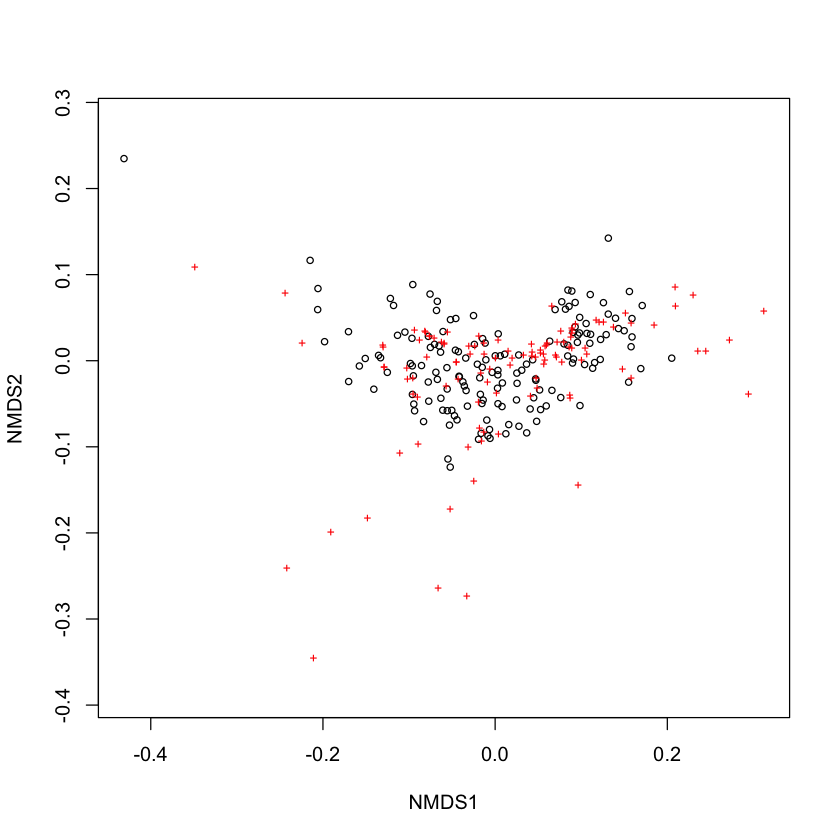

In [8]:
plot(nmds)

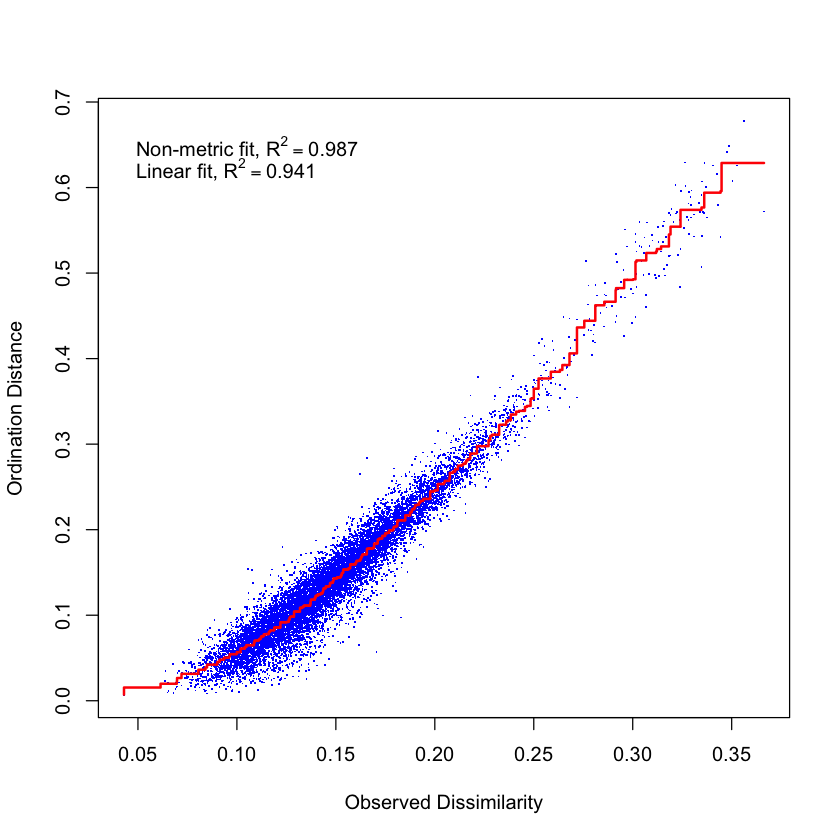

In [9]:
stressplot(nmds)

In [10]:
nmds$stress

[1] 0.1157888

In [11]:
nmds_points = as_tibble(nmds$points, rownames='SampleID')
nmds_w_meta = left_join(meta, nmds_points, by='SampleID')

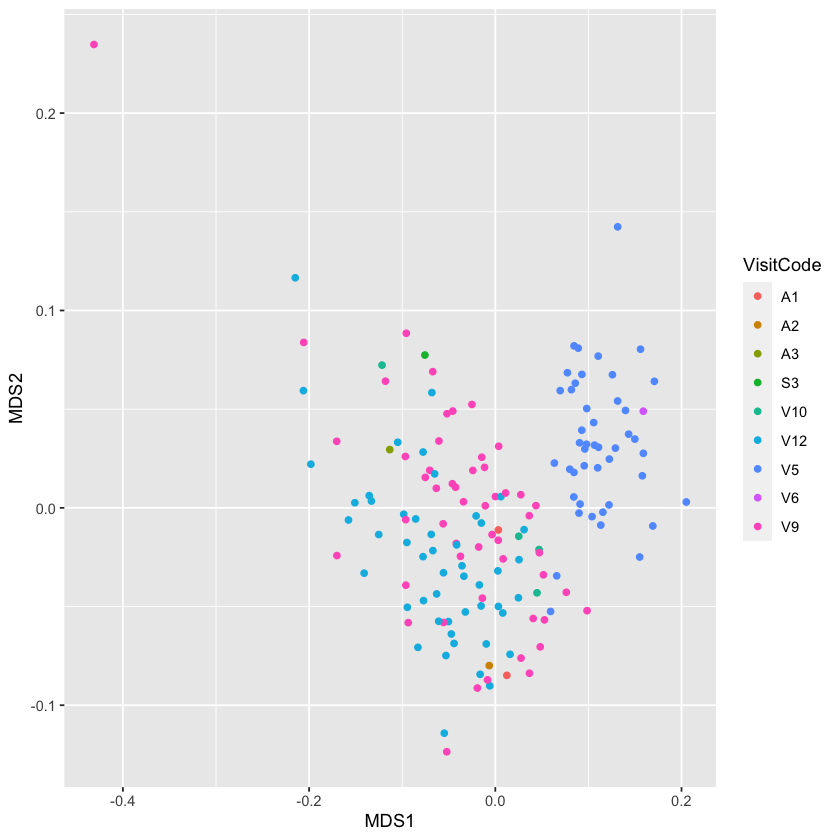

In [12]:
ggplot(nmds_w_meta, aes(x=MDS1, y=MDS2, color=VisitCode)) + geom_point()

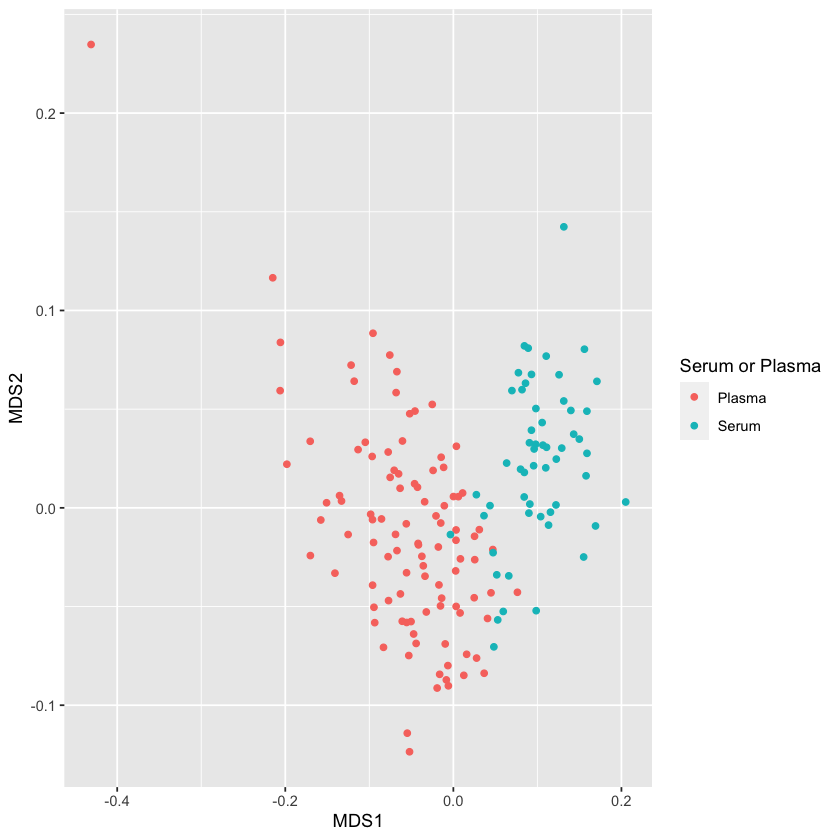

In [13]:
ggplot(nmds_w_meta, aes(x=MDS1, y=MDS2, color=`Serum or Plasma`)) + geom_point()

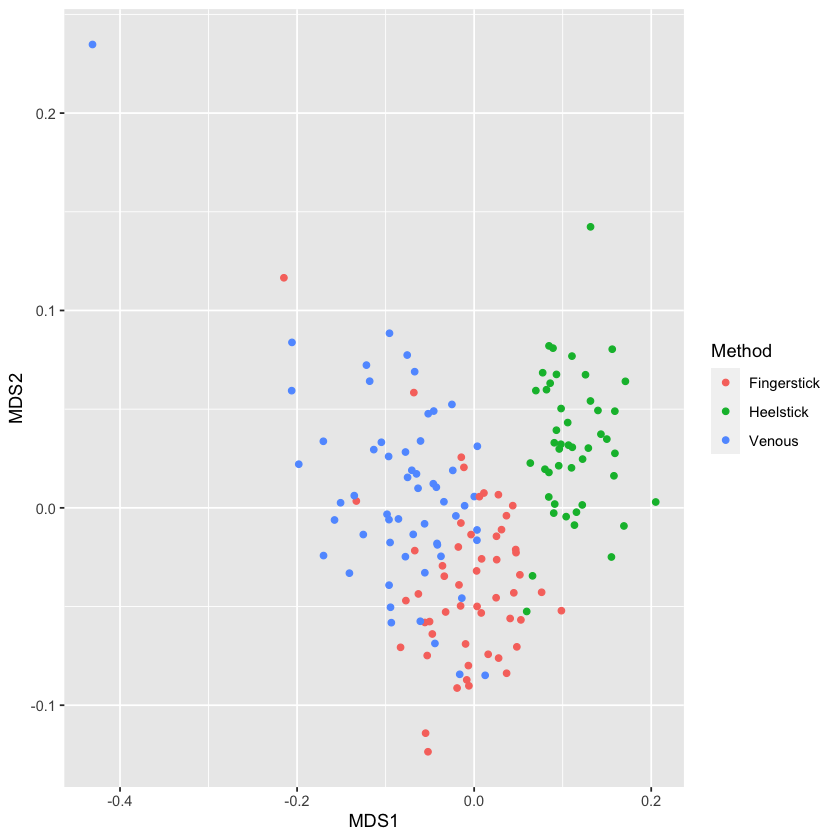

In [14]:
ggplot(nmds_w_meta, aes(x=MDS1, y=MDS2, color=Method)) + geom_point()